## Stock Price Prediction Using Machine Learning
* Decision tree Regression
* Linear Regression
* Support Vector Machines

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
amazon=pd.read_csv("AMZN.csv")
print(amazon.head())


         Date         Open         High          Low        Close  \
0  2021-04-13  3400.850098  3432.000000  3395.629883  3400.000000   
1  2021-04-14  3404.040039  3404.129883  3326.000000  3333.000000   
2  2021-04-15  3371.000000  3397.000000  3352.000000  3379.090088   
3  2021-04-16  3380.000000  3406.800049  3355.590088  3399.439941   
4  2021-04-19  3390.330078  3435.929932  3360.159912  3372.010010   

     Adj Close   Volume  
0  3400.000000  3315800  
1  3333.000000  3145200  
2  3379.090088  3233600  
3  3399.439941  3186000  
4  3372.010010  2725400  


### To Visualize the close price Data

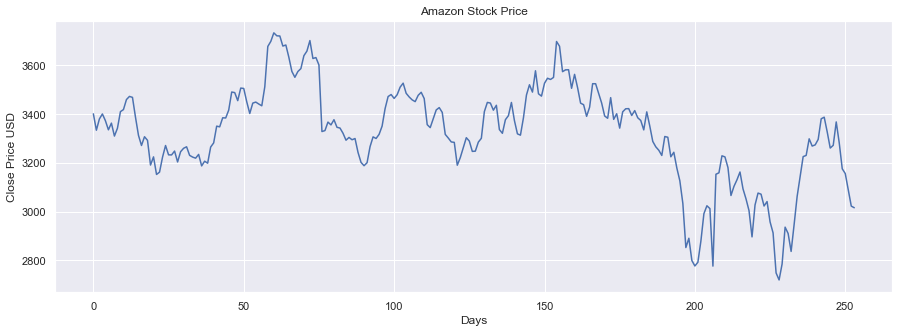

In [2]:
sns.set()
plt.figure(figsize=(15,5))
plt.title("Amazon Stock Price")
plt.xlabel("Days")
plt.ylabel("Close Price USD")
plt.plot(amazon["Close"])
plt.show()

### To get the Close Price

In [3]:
amazon=amazon[['Close']]
print(amazon.head())

         Close
0  3400.000000
1  3333.000000
2  3379.090088
3  3399.439941
4  3372.010010


In [4]:
FutureDays=30 #Future prediction days

### Creating Taget column (Prediction)

In [5]:
amazon["Prediction"]=amazon['Close'].shift(-FutureDays)

In [16]:
print(amazon.head())
print(amazon.tail())
print(amazon.tail())

         Close   Prediction
0  3400.000000  3259.050049
1  3333.000000  3265.159912
2  3379.090088  3230.110107
3  3399.439941  3223.070068
4  3372.010010  3218.649902
           Close  Prediction
249  3175.120117         NaN
250  3155.689941         NaN
251  3089.209961         NaN
252  3022.439941         NaN
253  3015.750000         NaN
           Close  Prediction
249  3175.120117         NaN
250  3155.689941         NaN
251  3089.209961         NaN
252  3022.439941         NaN
253  3015.750000         NaN


In [7]:
import numpy as np
x=np.array(amazon.drop(["Prediction"],1))[:-FutureDays]
print(x)

[[3400.      ]
 [3333.      ]
 [3379.090088]
 [3399.439941]
 [3372.01001 ]
 [3334.689941]
 [3362.02002 ]
 [3309.040039]
 [3340.879883]
 [3409.      ]
 [3417.429932]
 [3458.5     ]
 [3471.310059]
 [3467.419922]
 [3386.48999 ]
 [3311.870117]
 [3270.540039]
 [3306.370117]
 [3291.610107]
 [3190.48999 ]
 [3223.909912]
 [3151.939941]
 [3161.469971]
 [3222.899902]
 [3270.389893]
 [3232.280029]
 [3231.800049]
 [3247.679932]
 [3203.080078]
 [3244.98999 ]
 [3259.050049]
 [3265.159912]
 [3230.110107]
 [3223.070068]
 [3218.649902]
 [3233.98999 ]
 [3187.01001 ]
 [3206.219971]
 [3198.01001 ]
 [3264.110107]
 [3281.149902]
 [3349.649902]
 [3346.830078]
 [3383.870117]
 [3383.129883]
 [3415.25    ]
 [3489.23999 ]
 [3486.899902]
 [3453.959961]
 [3505.439941]
 [3503.820068]
 [3449.080078]
 [3401.459961]
 [3443.889893]
 [3448.139893]
 [3440.159912]
 [3432.969971]
 [3510.97998 ]
 [3675.73999 ]
 [3696.580078]
 [3731.409912]
 [3719.340088]
 [3718.550049]
 [3677.360107]
 [3681.679932]
 [3631.199951]
 [3573.629

C:\Users\acer\AppData\Local\Temp/ipykernel_9724/2074533361.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x=np.array(amazon.drop(["Prediction"],1))[:-FutureDays]


In [8]:
y = np.array(amazon["Prediction"])[:-FutureDays]
print(y)

[3259.050049 3265.159912 3230.110107 3223.070068 3218.649902 3233.98999
 3187.01001  3206.219971 3198.01001  3264.110107 3281.149902 3349.649902
 3346.830078 3383.870117 3383.129883 3415.25     3489.23999  3486.899902
 3453.959961 3505.439941 3503.820068 3449.080078 3401.459961 3443.889893
 3448.139893 3440.159912 3432.969971 3510.97998  3675.73999  3696.580078
 3731.409912 3719.340088 3718.550049 3677.360107 3681.679932 3631.199951
 3573.629883 3549.590088 3573.189941 3585.199951 3638.030029 3656.639893
 3699.820068 3626.389893 3630.320068 3599.919922 3327.590088 3331.47998
 3366.23999  3354.719971 3375.98999  3344.939941 3341.870117 3320.679932
 3292.110107 3303.5      3293.969971 3298.98999  3241.959961 3201.219971
 3187.75     3199.949951 3265.870117 3305.780029 3299.179932 3316.
 3349.629883 3421.570068 3470.790039 3479.       3463.120117 3478.050049
 3509.290039 3525.5      3484.159912 3469.149902 3457.169922 3450.
 3475.790039 3488.23999  3462.52002  3355.72998  3343.629883 3380

In [9]:
#Split the data into 90% training and 10% testing
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1)

### Creating Models

In [10]:
# Creating the decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(xtrain, ytrain)

# creating the Linear Regression model
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(xtrain, ytrain)

# creating the svm model
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
svm = svr.fit(xtrain, ytrain)

In [11]:
xfuture = amazon.drop(["Prediction"], 1)[:-FutureDays]
xfuture = xfuture.tail(FutureDays)
xfuture = np.array(xfuture)
print(xfuture)

[[3178.350098]
 [3125.97998 ]
 [3033.350098]
 [2852.860107]
 [2890.879883]
 [2799.719971]
 [2777.449951]
 [2792.75    ]
 [2879.560059]
 [2991.469971]
 [3023.870117]
 [3012.25    ]
 [2776.909912]
 [3152.790039]
 [3158.709961]
 [3228.27002 ]
 [3223.790039]
 [3180.070068]
 [3065.870117]
 [3103.340088]
 [3130.209961]
 [3162.01001 ]
 [3093.050049]
 [3052.030029]
 [3003.949951]
 [2896.540039]
 [3027.159912]
 [3075.77002 ]
 [3071.26001 ]
 [3022.840088]]


C:\Users\acer\AppData\Local\Temp/ipykernel_9724/1555300527.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  xfuture = amazon.drop(["Prediction"], 1)[:-FutureDays]


In [12]:
#To see the model tree prediction
treePrediction = tree.predict(xfuture)
print("Decision Tree prediction =",treePrediction)

#To see the model linear regression prediction
linearPrediction = linear.predict(xfuture)
print("Linear regression Prediction =",linearPrediction)

#To see the model Support vector machine
svmPrediction = svr.predict(xfuture)
print("Support vector machine Prediction =",svmPrediction)

Decision Tree prediction = [3041.050049 2957.969971 2912.820068 2749.060059 2720.290039 2785.580078
 2936.350098 2910.48999  2837.060059 2947.330078 3062.080078 3144.780029
 3225.01001  3229.830078 3297.780029 3268.159912 3272.98999  3295.469971
 3379.810059 3386.300049 3326.02002  3401.459961 3271.199951 3366.929932
 3281.100098 3175.120117 3155.689941 3089.209961 3022.439941 3015.75    ]
Linear regression Prediction = [3276.17487845 3261.87278909 3236.57590414 3187.28474195 3197.66780494
 3172.77236347 3166.69050175 3170.86888966 3194.57640205 3225.13859329
 3233.9869557  3230.81354387 3166.54301905 3269.194519   3270.81122824
 3289.80782816 3288.5843616  3276.64459602 3245.45700343 3255.68991666
 3263.02798156 3271.71245966 3252.87974432 3241.67732557 3228.54683058
 3199.21357302 3234.88538678 3248.16063105 3246.92896367 3233.70565851]
Support vector machine Prediction = [3041.15008646 2958.06969329 2912.91995449 2749.16012943 2720.38964813
 2785.67982684 3170.37180988 2910.58989839

### Visualize Decision Tree Predictions

C:\Users\acer\AppData\Local\Temp/ipykernel_9724/2838319956.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


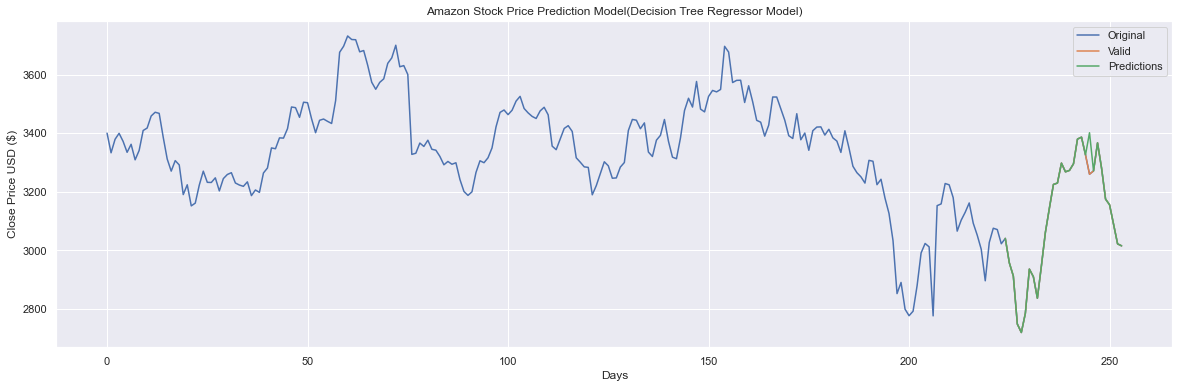

In [13]:
predictions = treePrediction
valid = amazon[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(20, 6))
plt.title("Amazon Stock Price Prediction Model(Decision Tree Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(amazon["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

### Visualize the Linear Model Predictions 

C:\Users\acer\AppData\Local\Temp/ipykernel_9724/2713820942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


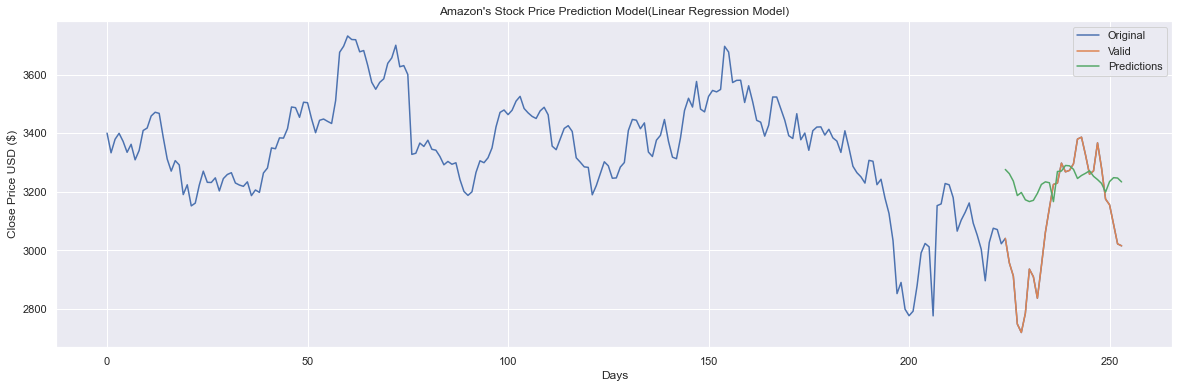

In [14]:
predictions = linearPrediction
valid = amazon[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(20, 6))
plt.title("Amazon's Stock Price Prediction Model(Linear Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(amazon["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

### Visualize the Support vector Machine Model Predictions

C:\Users\acer\AppData\Local\Temp/ipykernel_9724/2276254179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


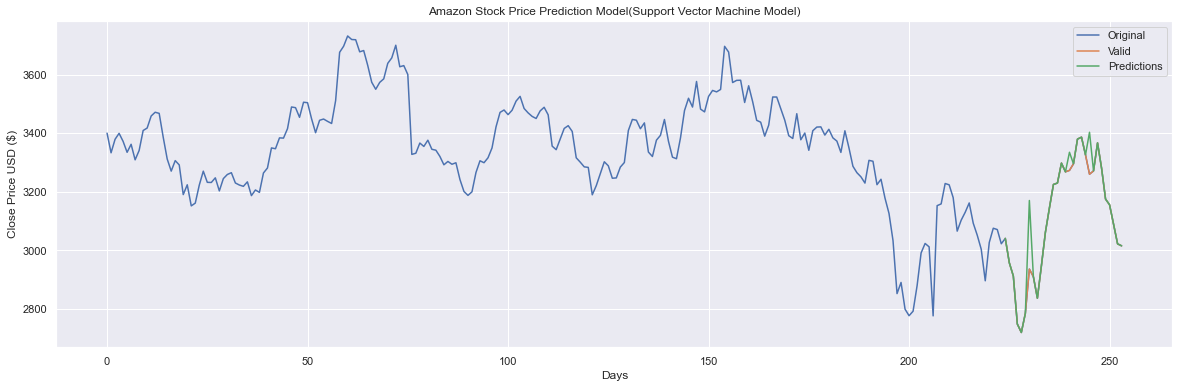

In [15]:
predictions = svmPrediction
valid = amazon[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(20, 6))
plt.title("Amazon Stock Price Prediction Model(Support Vector Machine Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(amazon["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()